# Neural Networks

We want to build a model to discriminate **red** and **green** points 2-dimensional space.

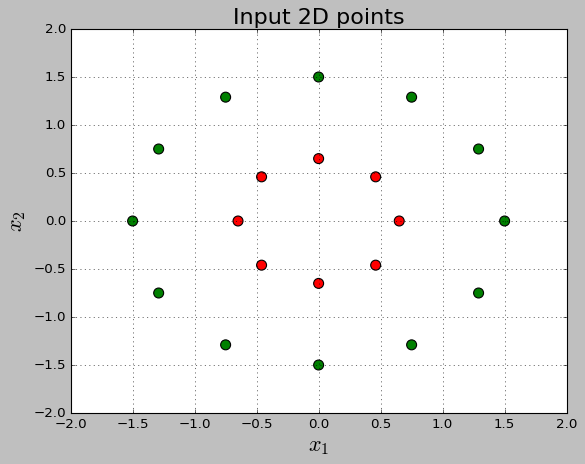

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

X = np.array([[ 0.65, 0.00],
              [ 0.00,-0.65],
	      [-0.75,-1.29],
	      [ 1.29, 0.75],
	      [-0.46,-0.46],
	      [-1.29,-0.75],
	      [ 0.00, -1.5],
	      [ 0.46, 0.46],
	      [ 0.46,-0.46],
	      [-1.29, 0.75],
 	      [-0.46, 0.46],
	      [ 0.00, 0.65],
	      [ 0.75,-1.29],
	      [ 1.29,-0.75],
	      [-0.65, 0.00],
	      [ 1.50, 0.00],
	      [-1.50, 0.00],
	      [ 0.75, 1.29],
	      [-0.75, 1.29],
	      [ 0.00, 1.50]])
y = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

colormap = np.array(['r', 'g'])

def plot_scatter(X, Y, colormap):
   plt.grid()
   plt.xlim([-2.0, 2.0])
   plt.ylim([-2.0, 2.0])
   plt.xlabel('$x_1$', size=20)
   plt.ylabel('$x_2$', size=20)
   plt.title('Input 2D points', size=20)
   plt.scatter(X[:,0], X[:,1], s=80, c=colormap[y])

plot_scatter(X, y, colormap)

Given an input point $\textbf{x}=(x_1, x_2)$, we need to predict the output, either **red** or **green** (0 means red, 1 means green).

This dataset is NOT **linearly separable**.

To build a good classifier for this dataset, we need to implement a **neural network**, which is quite similar to Logistic Regression (or Softmax Regression), but with more **layers**.

# Computation Graph

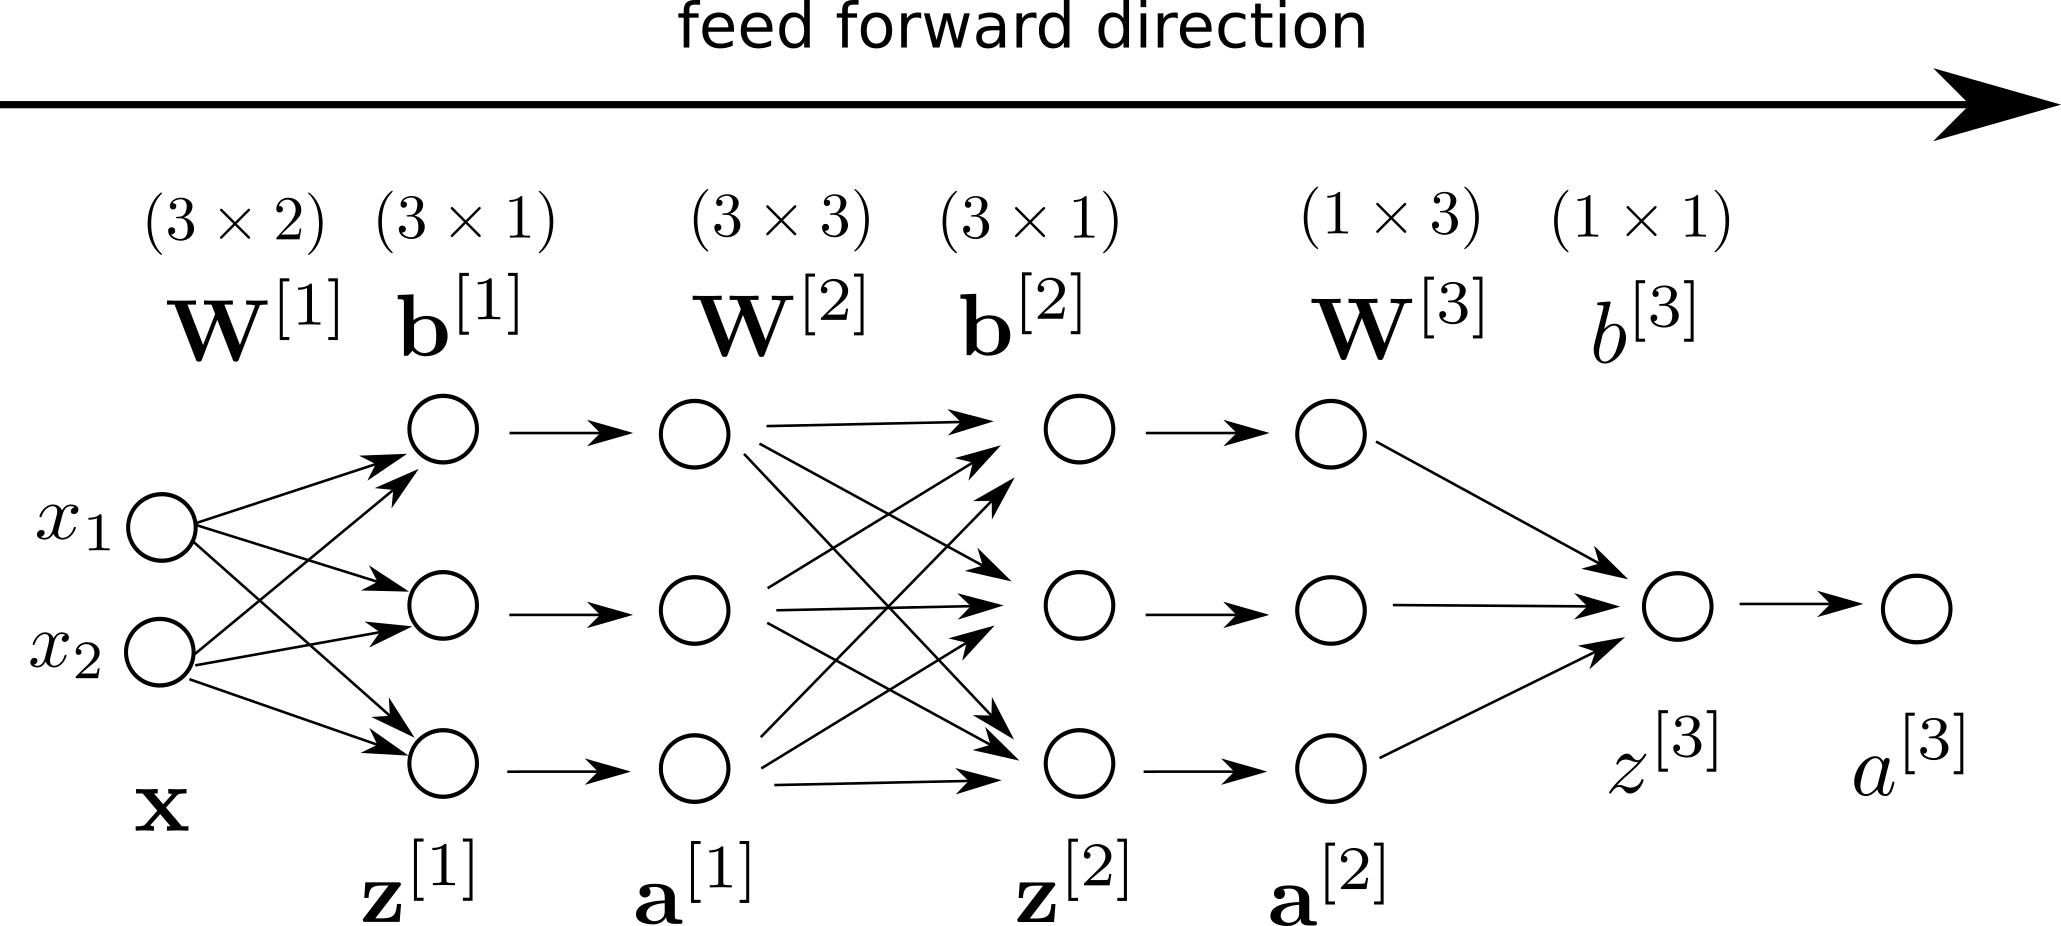

In this example,

* The input layer has 2 neurons, corresponding to each input feature.
* The first hidden layer has parameters: weights $\textbf{W}^{[1]}$ and bias $\textbf{b}^{[1]}$. The first hidden layer transforms input $\textbf{x}$ into output $\textbf{a}^{[1]}$.
* The second hidden layer has parameters: weights $\textbf{W}^{[2]}$ and bias $\textbf{b}^{[2]}$. The second hidden layer takes the output $\textbf{a}^{[1]}$ of the previous layer as its input and transforms it into output $\textbf{a}^{[2]}$.
* The third layer is the output layer, which has parameters: weights $\textbf{W}^{[3]}$ and bias $\textbf{b}^{[3]}$. This last layer takes the output $\textbf{a}^{[2]}$ of the previous layer as its input and transforms it into output $\textbf{a}^{[3]}$.
* $\textbf{a}^{[3]}$ is the output of the neural network in this example. 

Our prediction for the output would be

$
\text{Predicted class} = \begin{cases}
    0, & \text{if $a^{[3]} < 0.5$}\\
    1, & \text{otherwise}.
\end{cases}
$

# Feed-forward Phase

Given the parameters of a neural network, and an input $\textbf{x}$, how to produce an output.

For this example, we have

$\textbf{z}^{[1]} = \textbf{W}^{[1]}\textbf{x} + \textbf{b}^{[1]}$

$\textbf{a}^{[1]}=g(\textbf{z}^{[1]} )$

$\textbf{W}^{[1]}$ is of size $(3\times 2)$, $\textbf{x}$ is of size $(2\times 1)$, $\textbf{b}^{[1]}$ is of size $(3\times 1)$.

$g()$ is the **activation function**. Here, we use **sigmoid** as the activation function.

$\textbf{z}^{[2]} = \textbf{W}^{[2]}\textbf{a}^{[1]} + \textbf{b}^{[2]}$

$\textbf{a}^{[2]}=g(\textbf{z}^{[2]} )$

$\textbf{W}^{[2]}$ is of size $(3\times 3)$, $\textbf{a}^{[1]}$ is of size $(3\times 1)$, $\textbf{b}^{[2]}$ is of size $(3\times 1)$.

We also have the sigmoid function $g()$ as the activation function for this layer.

$z^{[3]} = \textbf{W}^{[3]}\textbf{a}^{[2]} + b^{[3]}$

$a^{[3]}=g(z^{[3]} )$

$\textbf{W}^{[3]}$ is of size $(1\times 3)$, $\textbf{a}^{[2]}$ is of size $(3\times 1)$, $b^{[3]}$ is of size $(1\times 1)$ (i.e., a scalar).

We also have the sigmoid function $g()$ as the activation function for this layer.

We can write the feed-forward phase for the above neural network as follows.

$a^{[3]}=g(\textbf{W}^{[3]}\textbf{a}^{[2]} + b^{[3]})\\
=g(\textbf{W}^{[3]}(g(\textbf{z}^{[2]}) + b^{[3]})\\
=g(\textbf{W}^{[3]}(g(\textbf{W}^{[2]}\textbf{a}^{[1]} + \textbf{b}^{[2]}) + b^{[3]})\\
=g(\textbf{W}^{[3]}(g(\textbf{W}^{[2]}(g(\textbf{z}^{[1]})) + \textbf{b}^{[2]}) + b^{[3]})\\
=g(\textbf{W}^{[3]}(g(\textbf{W}^{[2]}(g(\textbf{W}^{[1]}\textbf{x} + \textbf{b}^{[1]})) + \textbf{b}^{[2]}) + b^{[3]})$

Can we do this?

$a^{[3]}=g(\textbf{W}^{[3]}(\textbf{W}^{[2]}(\textbf{W}^{[1]}\textbf{x} + \textbf{b}^{[1]}) + \textbf{b}^{[2]}) + b^{[3]})\\
=g(\textbf{W}^{[3]}(\textbf{W}^{[2]}\textbf{W}^{[1]}\textbf{x} + \textbf{W}^{[2]}\textbf{b}^{[1]} + \textbf{b}^{[2]}) + b^{[3]})\\
=g(\textbf{W}^{[3]}\textbf{W}^{[2]}\textbf{W}^{[1]}\textbf{x} + \textbf{W}^{[3]}\textbf{W}^{[2]}\textbf{b}^{[1]} + \textbf{W}^{[3]}\textbf{b}^{[2]} + b^{[3]})\\
=g(\textbf{W}\textbf{x} + \textbf{b} + b^{[3]})$

Because $\textbf{W}^{[3]}$ is actually a row vector of size $(1\times 3)$, we would have

$a^{[3]}=g(\textbf{w}^T\textbf{x} + b)$
which is actually a Logistic Regression model, which can only produce a linear classifier.

Why do we need activation function $g(x)$ between each layer of a neural network?

In [ ]:
sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))

In [ ]:
def forward(x, W1, b1, W2, b2, W3, b3):
    z1 = np.matmul(W1, x) + b1 # z1 here is a vector
    a1 = sigmoid(z1) # a1 here is not a number, but a vector

    z2 = np.matmul(W2, a1) + b2 # z2 here is a vector
    a2 = sigmoid(z2) # a2 is a vector

    z3 = np.matmul(W3, a2) + b3 # z3 here is a (1x1) vector --> a number
    a3 = sigmoid(z3) # a3 here is a number

    return z1, a1, z2, a2, z3, a3
    # return a3 # a3 is the output of our neural network

In [ ]:
# Initialize the neural network with random parameters
W1_initial = np.random.rand(3, 2)
W1 = W1_initial.copy()
b1 = np.zeros((3, 1))
W2_initial = np.random.rand(3, 3)
W2 = W2_initial.copy()
b2 = np.zeros((3, 1))
W3_initial = np.random.rand(1, 3)
W3 = W3_initial.copy()
b3 = np.zeros((1, 1))

In [ ]:
# Let's try to make some prediction with this neural network
x = X[0,:].reshape(2,1)
label = y[0]
print(f'The coordinates of the input point is {x.squeeze()}')
print(f'True label is {label}')

z1, a1, z2, a2, z3, a3 = forward(x, W1, b1, W2, b2, W3, b3)
predicted_value = a3
print(f'Predicted value is {predicted_value.squeeze()}')

The coordinates of the input point is [0.65 0.  ]
True label is 0
Predicted value is 0.7422673356586359


Because the parameters of the neural networks has random values, its predictions are not good.

How to learn these parameters properly?

# Cross Entropy Loss Function

We want to find parameter values of our neural network that minimizes a **cost function**. We use the same cost function (or loss function) as in Logistic Regression or Softmax Regression.

For the neural network in this example, we have the cost function 

$J = -\sum_{i=1}^N[ y^{(i)}\log(a^{[3](i)})+(1-y^{(i)})\log(1-a^{[3](i)})]$

Because we have only two classes, this loss function is also called **Binary Cross Entropy Loss**.

If we have more than two classes, we use the general **Cross Entropy Loss** function.

$J = -\sum_{i=1}^N \sum_{j=1}^C y^{(i)}_j\log(a^{[3]}_j)^{y^{[i]}_j}$

If we want to compute the loss function for a sample $i$ in our dataset.

$L = -( y^{(i)}\log(a^{[3](i)})+(1-y^{(i)})\log(1-a^{[3](i)}))$

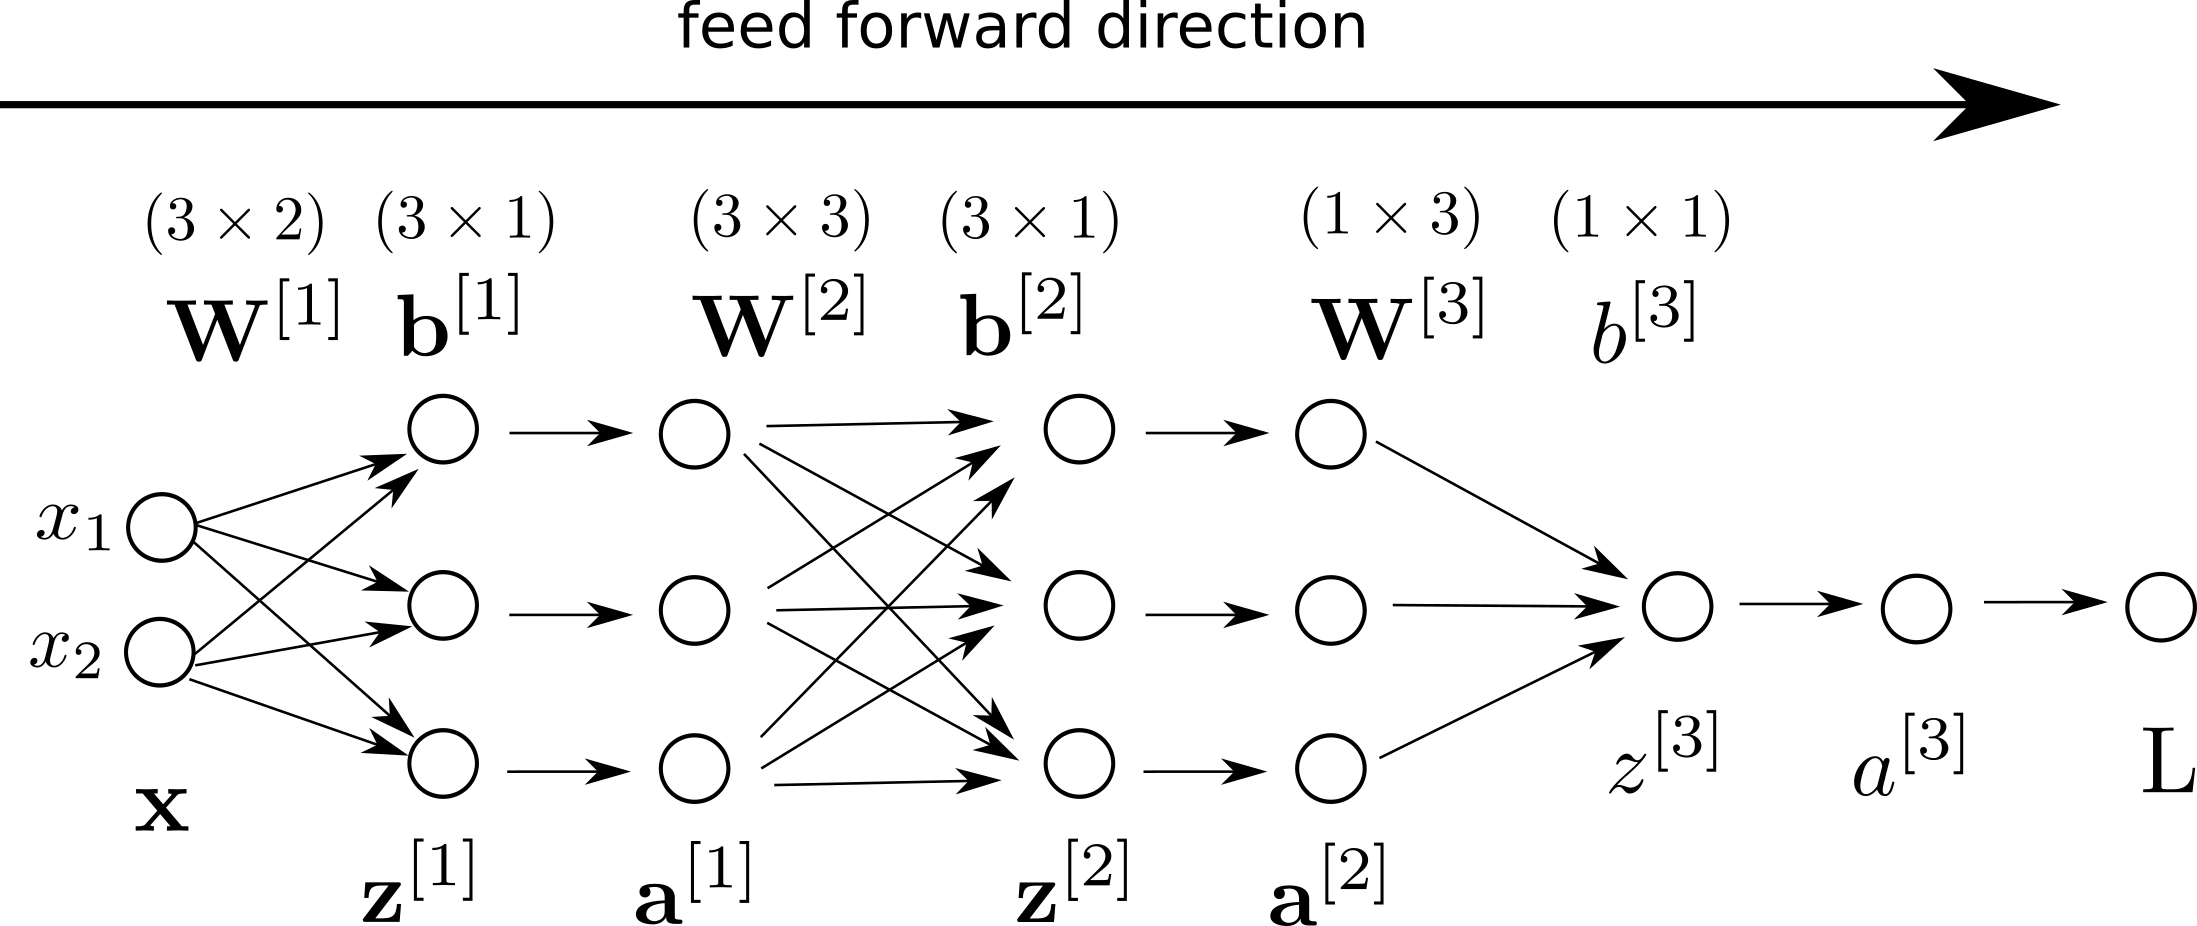

# Backpropagation

We also use Gradient Descent to find the parameter values for the neural network.

In order to find the parameter values that minimize the cost/loss function, we need to compute the gradient/derivates of the loss function $L$ with respect to the parameters at each layer of the neural network.

$\frac{dL}{d\textbf{W}^{[i]}},\quad \frac{dL}{d\textbf{b}^{[i]}}$

We use **Chain Rule** to compute these derivatives.

We apply chain rule in the opposite direction to the feed-forward direction (hence the name **backpropagation**).

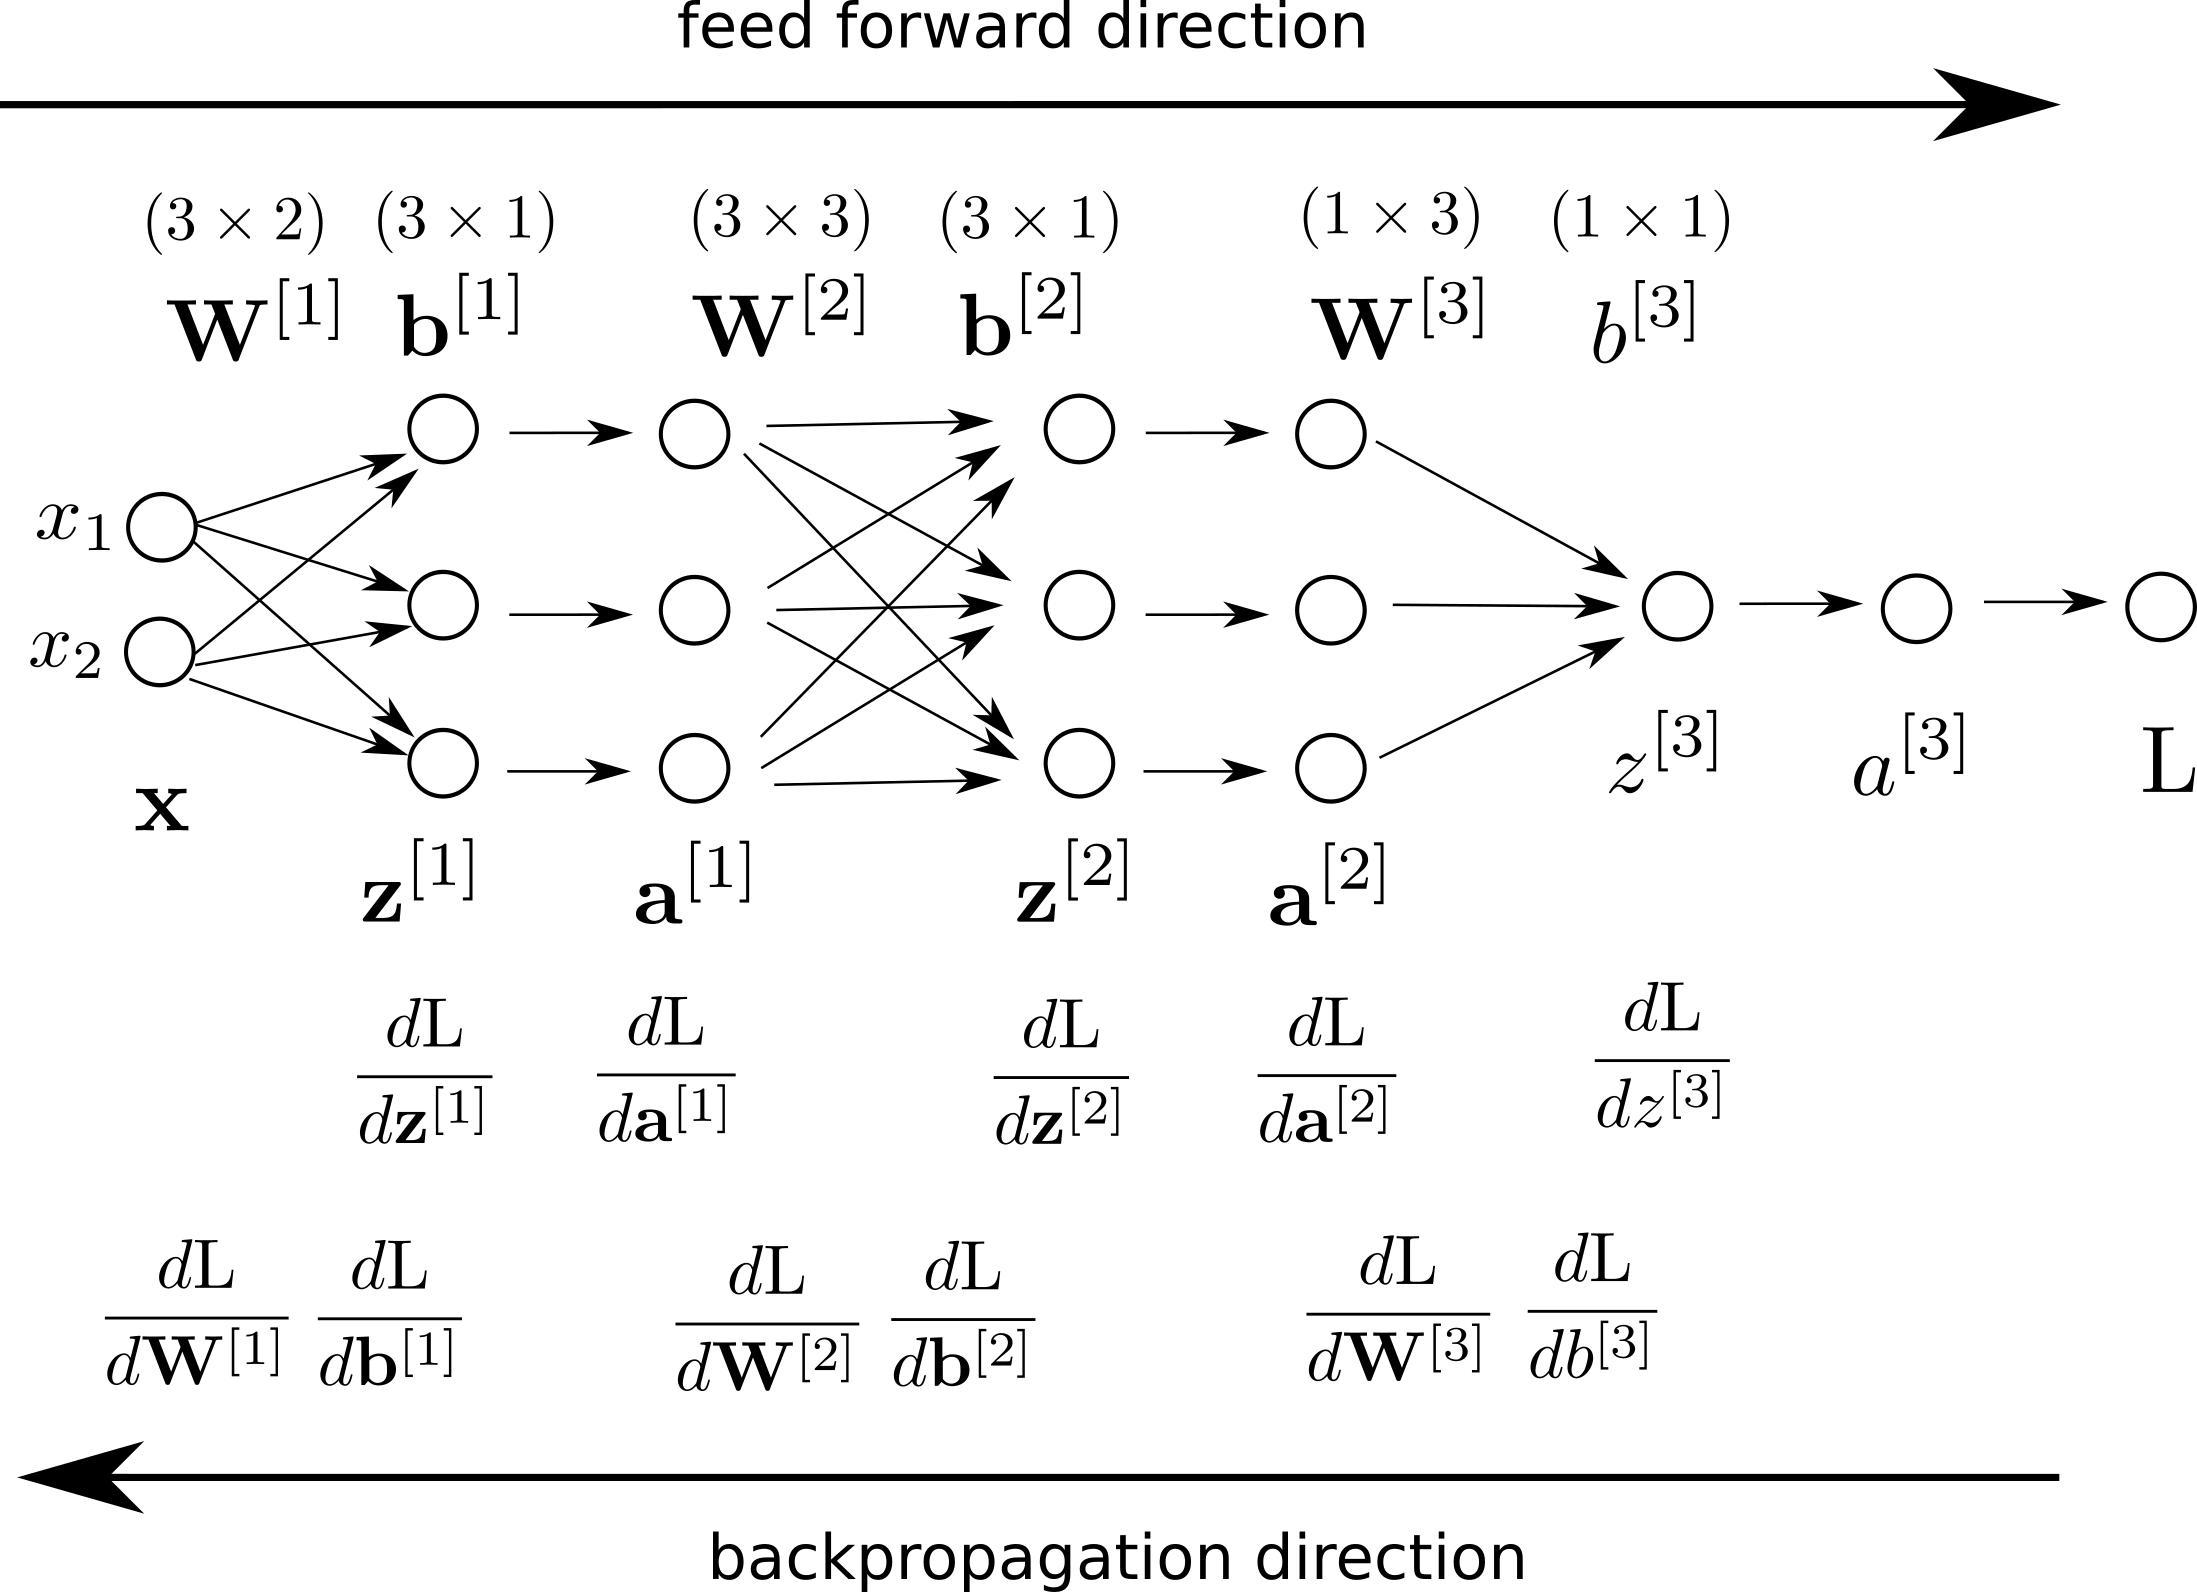

For the sake of simplicity, we will use only **one sample** here. So we can drop the notation $(i)$.

In Logistic Regression, we already computed 

$\frac{dL}{dz^{[3]}} = a^{[3]}-y$

Next, we compute $\frac{dz^{[3]}}{d\textbf{W}^{[3]}}$ and $\frac{dz^{[3]}}{db^{[3]}}$.


$z^{[3]}=\textbf{W}^{[3]}\textbf{a}^{[2]}+b^{[3]}$

$
\begin{bmatrix}
z^{[3]}
\end{bmatrix}=
\begin{bmatrix}
w^{[3]}_{1,1} & w^{[3]}_{1,2} & w^{[3]}_{1,3}
\end{bmatrix}
\begin{bmatrix}
a^{[2]}_1 \\ a^{[2]}_2 \\ a^{[2]}_3
\end{bmatrix} + 
\begin{bmatrix}
b^{[3]}
\end{bmatrix} = w^{[3]}_{1,1}a^{[2]}_1 + w^{[3]}_{1,2}a^{[2]}_2 + w^{[3]}_{1,3}a^{[2]}_3 + b^{[3]}
$

We can see that:

* If we change $w^{[3]}_{1,1}$, $z^{[3]}$ will change proportionally to $a^{[2]}_1$.
* If we change $w^{[3]}_{1,2}$, $z^{[3]}$ will change proportionally to $a^{[2]}_2$.
* If we change $w^{[3]}_{1,3}$, $z^{[3]}$ will change proportionally to $a^{[2]}_3$.
* Thus, if we change $\textbf{W}^{[3]}$, $z^{[3]}$ will change proportionally to $\textbf{a}^{[2]}$.

Therefore,

$\frac{dz^{[3]}}{d\textbf{W}^{[3]}}=
\begin{bmatrix}
\frac{dz^{[3]}}{dw^{[3]}_{1,1}} & \frac{dz^{[3]}}{dw^{[3]}_{1,2}} & \frac{dz^{[3]}}{dw^{[3]}_{1,3}}
\end{bmatrix}=
\begin{bmatrix}
a^{[2]}_1 & a^{[2]}_2 & a^{[2]}_3
\end{bmatrix}
=(a^{[2]})^T$

Similarly, if we change $b^{[3]}$ a small amount, $z^{[3]}$ will also change the same amount in the same direction.

$
\frac{dz^{[3]}}{db^{[3]}}=1.
$

Now, we can have

$
\frac{dL}{d\textbf{W}^{[3]}}=\frac{dL}{dz^{[3]}}\frac{dz^{[3]}}{d\textbf{W}^{[3]}}=(a^{[3]}-y)(a^{[2]})^T
$

$
\frac{dL}{db^{[3]}}=\frac{dL}{dz^{[3]}}\frac{dz^{[3]}}{db^{[3]}}=(a^{[3]}-y)
$

Next, we need to calculate $\frac{dL}{d\textbf{W}^{[2]}}$, $\frac{dL}{d\textbf{b}^{[2]}}$.

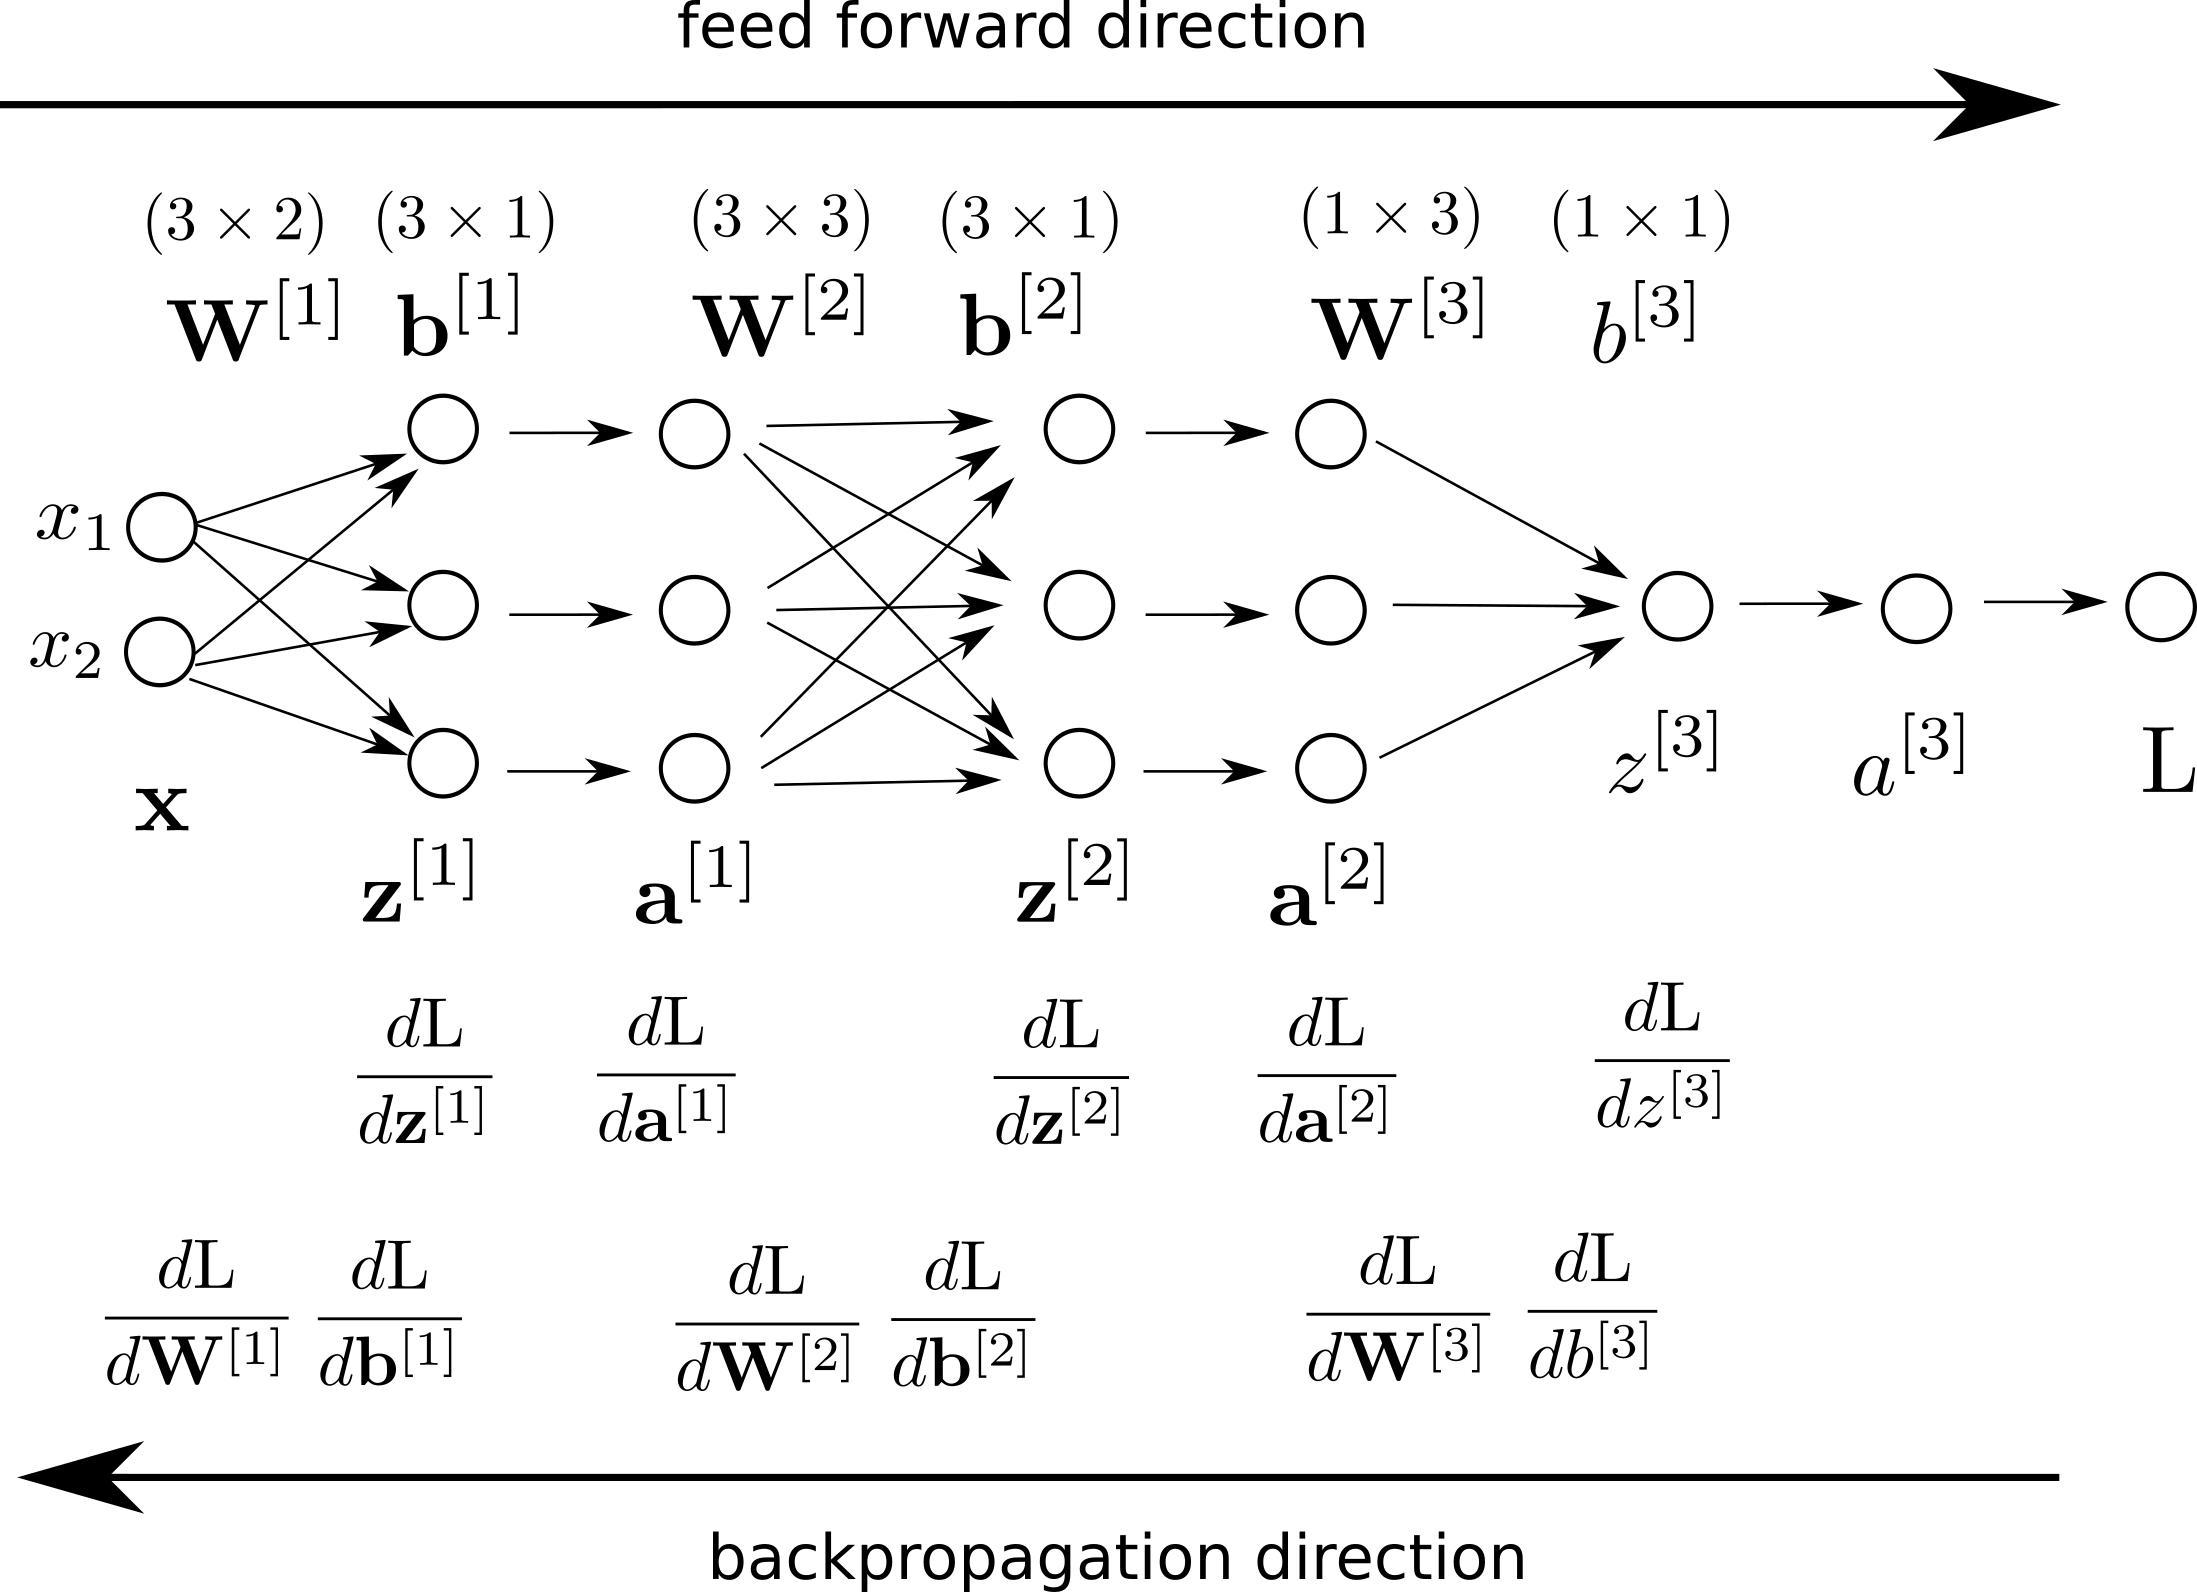

We need to compute $\frac{dL}{d\textbf{a}^{[2]}} = \frac{dL}{dz^{[3]}}\frac{dz^{[3]}}{d\textbf{a}^{[2]}}$

$z^{[3]}=\textbf{W}^{[3]}\textbf{a}^{[2]}+b^{[3]}$

$
\begin{bmatrix}
z^{[3]}
\end{bmatrix}=
\begin{bmatrix}
w^{[3]}_{1,1} & w^{[3]}_{1,2} & w^{[3]}_{1,3}
\end{bmatrix}
\begin{bmatrix}
a^{[2]}_1 \\ a^{[2]}_2 \\ a^{[2]}_3
\end{bmatrix} + 
\begin{bmatrix}
b^{[3]}
\end{bmatrix} = w^{[3]}_{1,1}a^{[2]}_1 + w^{[3]}_{1,2}a^{[2]}_2 + w^{[3]}_{1,3}a^{[2]}_3 + b^{[3]}
$

$\frac{dz^{[3]}}{d\textbf{a}^{[2]}}=
\begin{bmatrix}
\frac{dz^{[3]}}{da^{[2]}_1} \\ \frac{dz^{[3]}}{da^{[2]}_2} \\ \frac{dz^{[3]}}{da^{[2]}_3}
\end{bmatrix}=
\begin{bmatrix}
w^{[3]}_{1,1} \\ w^{[3]}_{1,2} \\ w^{[3]}_{1,3} 
\end{bmatrix}= (\textbf{W}^{[3]})^T$

Therefore, $\frac{dL}{d\textbf{a}^{[2]}} = \frac{dL}{dz^{[3]}}\frac{dz^{[3]}}{d\textbf{a}^{[2]}}=(a^{[3]}-y)(\textbf{W}^{[3]})^T$

Next, we compute $\frac{dL}{d\textbf{z}^{[2]}}$.

We have

$\textbf{a}^{[2]} = g(\textbf{z}^{[2]})$, where $g(z)=\frac{1}{1+e^{-z}}$ is the sigmoid function.

That is, 

$a^{[2]}_1=g(z^{[2]}_1)=\frac{1}{1+e^{-z^{[2]}_1}}$

$a^{[2]}_2=g(z^{[2]}_2)=\frac{1}{1+e^{-z^{[2]}_2}}$

$a^{[2]}_3=g(z^{[2]}_3)=\frac{1}{1+e^{-z^{[2]}_3}}$

In Logistic Regression, we already derived the derivative of the sigmoid function $\frac{da}{dz}=a(1-a)$. 

Thus, we have

$
\frac{d\textbf{a}^{[2]}}{d\textbf{z}^{[2]}} = 
\begin{bmatrix}
\frac{da^{[2]}_1}{dz^{[2]}_1} \\ \frac{da^{[2]}_2}{dz^{[2]}_2} \\ \frac{da^{[2]}_3}{dz^{[2]}_3}
\end{bmatrix}
=
\begin{bmatrix}
a^{[2]}_1(1-a^{[2]}_1) \\ a^{[2]}_2(1-a^{[2]}_2) \\ a^{[2]}_3(1-a^{[2]}_3)
\end{bmatrix}
=\textbf{a}^{[2]} \circ (1- \textbf{a}^{[2]})
$

Therefore,

$
\frac{dL}{d\textbf{z}^{[2]}}=
\begin{bmatrix}
\frac{dL}{dz^{[2]}_1} \\ \frac{dL}{dz^{[2]}_2} \\ \frac{dL}{dz^{[2]}_3}
\end{bmatrix}=
\begin{bmatrix}
\frac{dL}{da^{[2]}_1}\frac{da^{[2]}_1}{dz^{[2]}_1}\\
\frac{dL}{da^{[2]}_2}\frac{da^{[2]}_2}{dz^{[2]}_2}\\
\frac{dL}{da^{[2]}_3}\frac{da^{[2]}_3}{dz^{[2]}_3}
\end{bmatrix}=
\frac{dL}{d\textbf{a}^{[2]}}\circ (\textbf{a}^{[2]} \circ (1- \textbf{a}^{[2]}))
$

Now, we can calculate $\frac{dL}{d\textbf{W}^{[2]}}$ and $\frac{dL}{d\textbf{b}^{[2]}}$.

We have

$\textbf{z}^{[2]} = \textbf{W}^{[2]}\textbf{a}^{[1]} + \textbf{b}^{[2]}$

$\begin{bmatrix}
z^{[2]}_1\\z^{[2]}_2\\z^{[2]}_3\\
\end{bmatrix}=
\begin{bmatrix}
w^{[2]}_{1,1} & w^{[2]}_{1,2} & w^{[2]}_{1,3} \\
w^{[2]}_{2,1} & w^{[2]}_{2,2} & w^{[2]}_{2,3} \\
w^{[2]}_{3,1} & w^{[2]}_{3,2} & w^{[2]}_{3,3} \\
\end{bmatrix}
\begin{bmatrix}
a^{[1]}_1\\ a^{[1]}_2\\ a^{[1]}_3\\  
\end{bmatrix} +
\begin{bmatrix}
b^{[2]}_1 \\ b^{[2]}_2 \\ b^{[2]}_3
\end{bmatrix}$

$\frac{dL}{d\textbf{W}^{[2]}}
=
\begin{bmatrix}
\frac{dL}{dw^{[2]}_{1,1}} & \frac{dL}{dw^{[2]}_{1,2}} & \frac{dL}{dw^{[2]}_{1,3}}\\
\frac{dL}{dw^{[2]}_{2,1}} & \frac{dL}{dw^{[2]}_{2,2}} & \frac{dL}{dw^{[2]}_{2,3}}\\
\frac{dL}{dw^{[2]}_{3,1}} & \frac{dL}{dw^{[2]}_{3,2}} & \frac{dL}{dw^{[2]}_{3,3}}\\
\end{bmatrix}=
\begin{bmatrix}
\frac{dL}{dz^{[2]}_1}\frac{dz^{[2]}_1}{dw^{[2]}_{1,1}} & \frac{dL}{dz^{[2]}_1}\frac{dz^{[2]}_1}{dw^{[2]}_{1,2}} & \frac{dL}{dz^{[2]}_1}\frac{dz^{[2]}_1}{dw^{[2]}_{1,3}}\\
\frac{dL}{dz^{[2]}_2}\frac{dz^{[2]}_2}{dw^{[2]}_{2,1}} & \frac{dL}{dz^{[2]}_2}\frac{dz^{[2]}_2}{dw^{[2]}_{2,2}} & \frac{dL}{dz^{[2]}_2}\frac{dz^{[2]}_2}{dw^{[2]}_{2,3}}\\
\frac{dL}{dz^{[2]}_3}\frac{dz^{[2]}_3}{dw^{[2]}_{3,1}} & \frac{dL}{dz^{[2]}_3}\frac{dz^{[2]}_3}{dw^{[2]}_{3,2}} & \frac{dL}{dz^{[2]}_3}\frac{dz^{[2]}_3}{dw^{[2]}_{3,3}}\\
\end{bmatrix}\\
=
\begin{bmatrix}
\frac{dL}{dz^{[2]}_1}a^{[1]}_1 & \frac{dL}{dz^{[2]}_1}a^{[1]}_2 & \frac{dL}{dz^{[2]}_1}a^{[1]}_3\\
\frac{dL}{dz^{[2]}_2}a^{[1]}_1 & \frac{dL}{dz^{[2]}_2}a^{[1]}_2 & \frac{dL}{dz^{[2]}_2}a^{[1]}_3\\
\frac{dL}{dz^{[2]}_3}a^{[1]}_1 & \frac{dL}{dz^{[2]}_3}a^{[1]}_2 & \frac{dL}{dz^{[2]}_3}a^{[1]}_3
\end{bmatrix}=
\begin{bmatrix}
\frac{dL}{dz^{[2]}_1}\\
\frac{dL}{dz^{[2]}_2}\\
\frac{dL}{dz^{[2]}_3}
\end{bmatrix}
\begin{bmatrix}
a^{[1]}_1 & a^{[1]}_2 & a^{[1]}_3
\end{bmatrix}\\
=\frac{dL}{d\textbf{z}^{[2]}}(\textbf{a}^{[1]})^T
$ 

where we already computed $\frac{dL}{d\textbf{z}^{[2]}}$ above.

And, similarly as above, we have 

$\frac{dL}{d\textbf{b}^{[2]}}=\frac{dL}{d\textbf{z}^{[2]}}$.

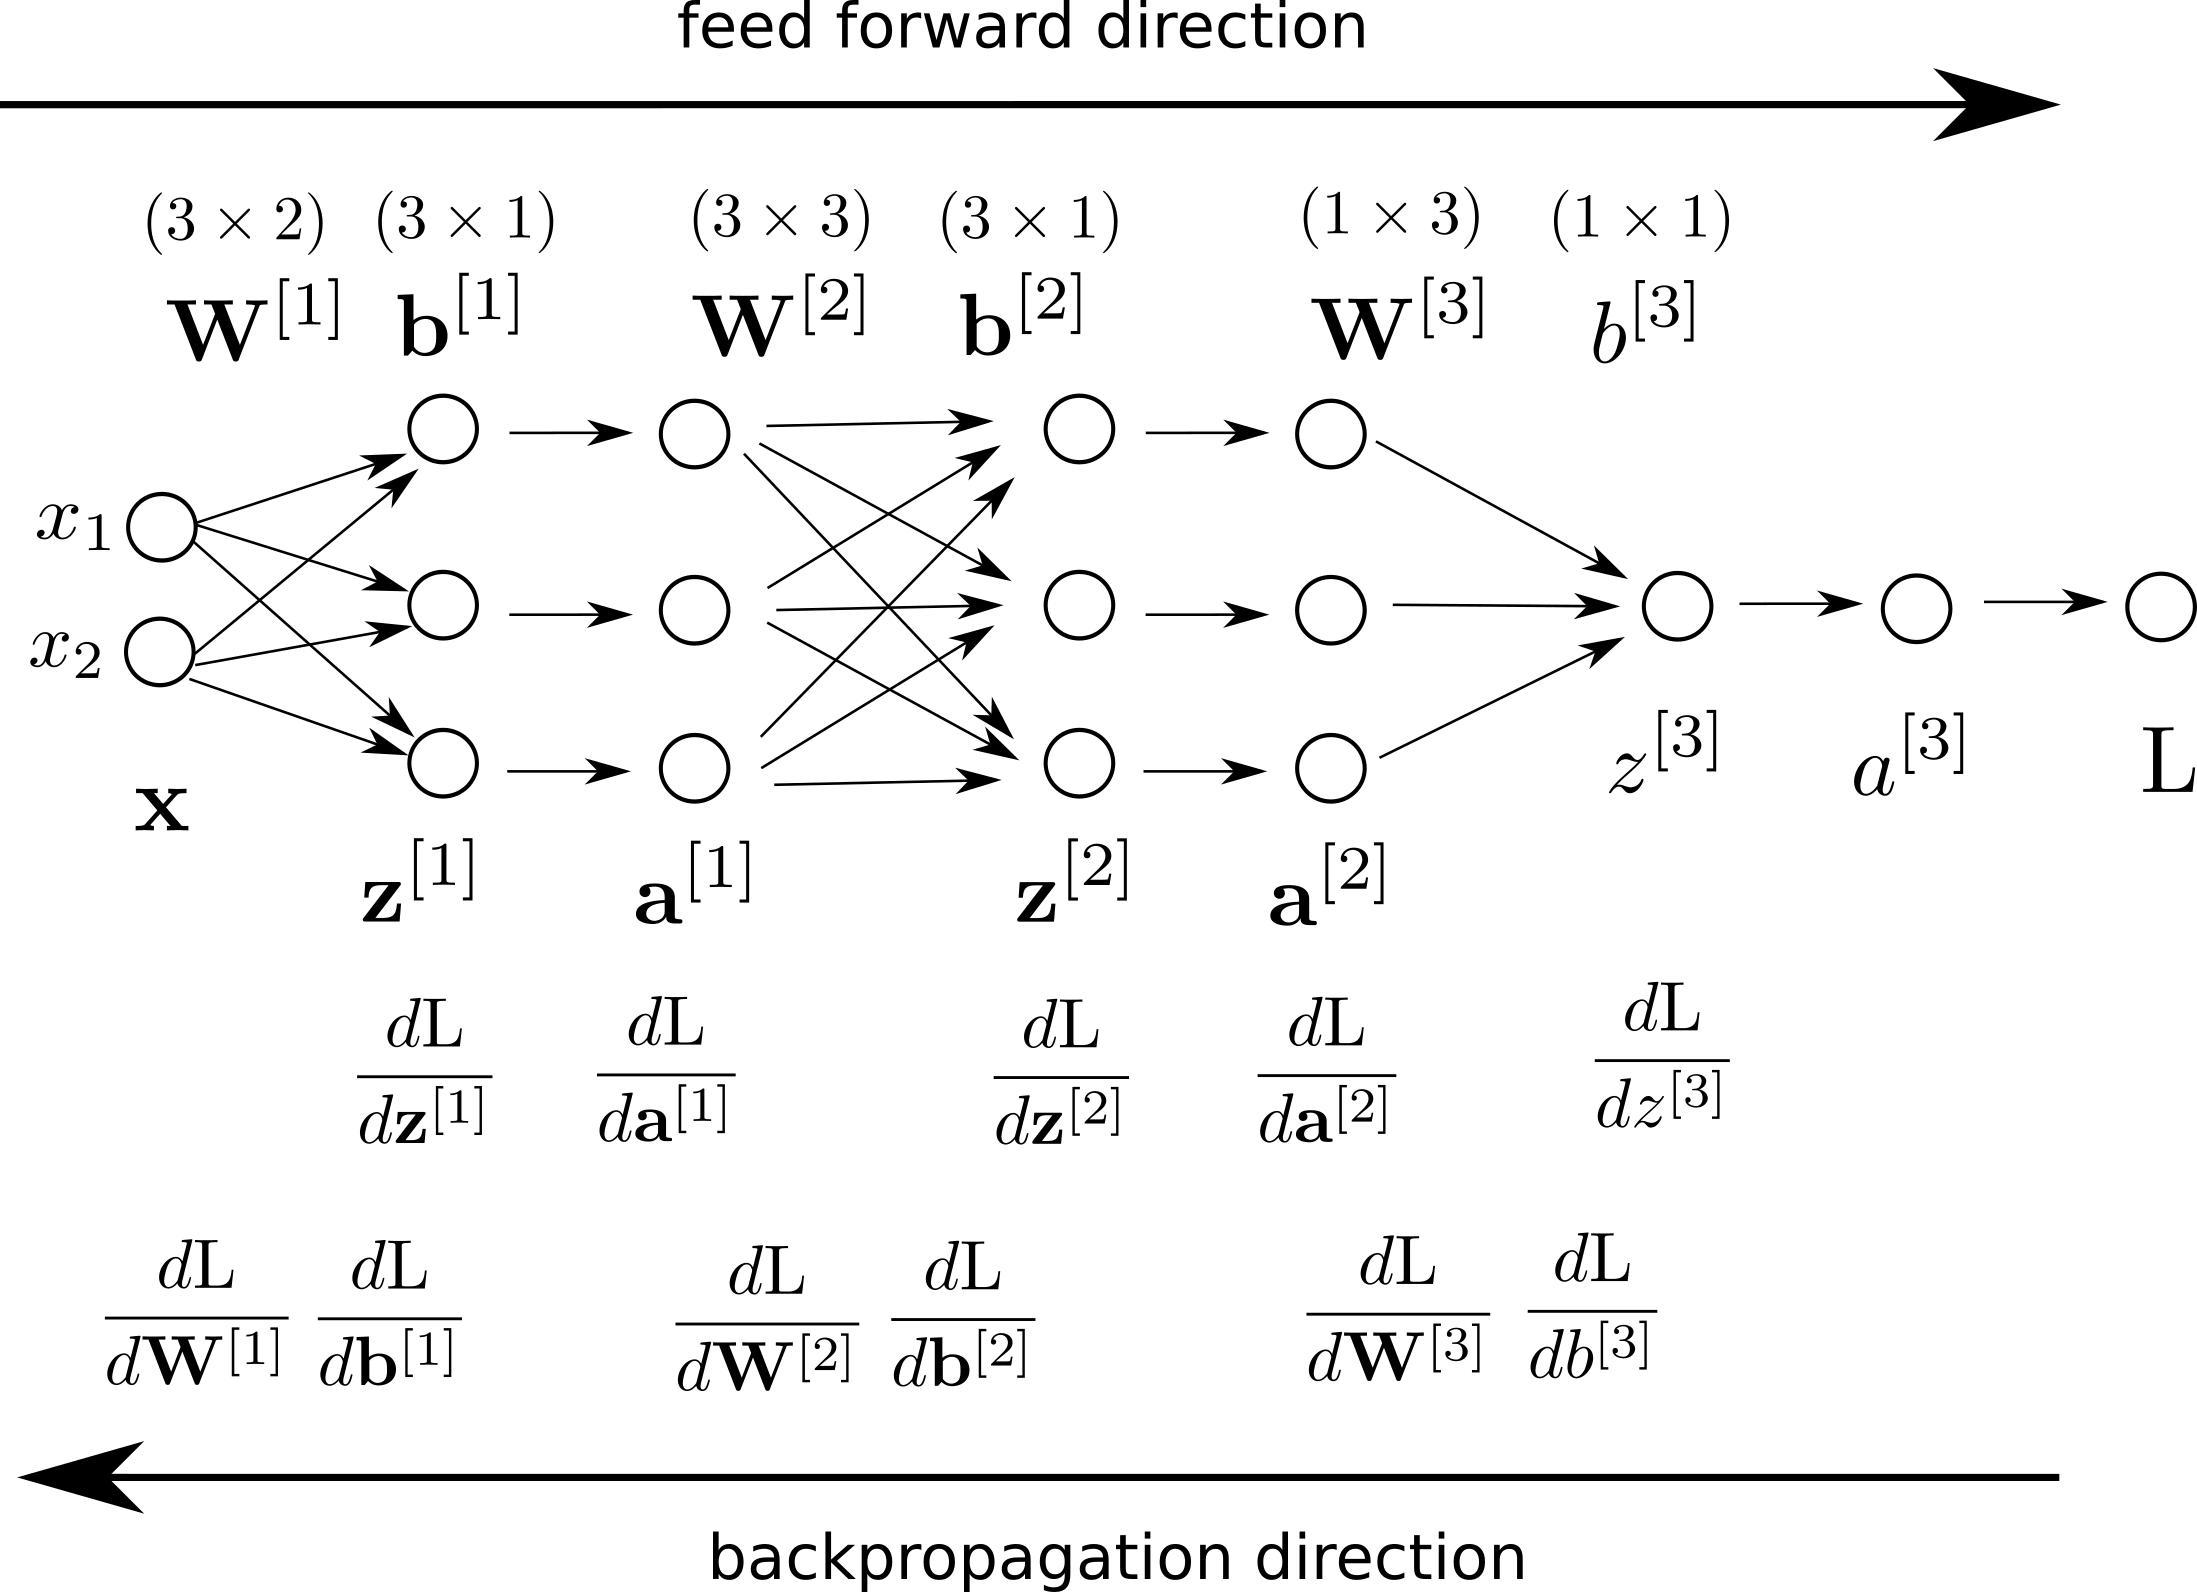

Next, we compute $\frac{dL}{d\textbf{a}^{[1]}}=\frac{dL}{d\textbf{z}^{[2]}}\frac{d\textbf{z}^{[2]}}{d\textbf{a}^{[1]}}$.

Again, we have


$\textbf{z}^{[2]} = \textbf{W}^{[2]}\textbf{a}^{[1]} + \textbf{b}^{[2]}$

$\begin{bmatrix}
z^{[2]}_1\\z^{[2]}_2\\z^{[2]}_3\\
\end{bmatrix}=
\begin{bmatrix}
w^{[2]}_{1,1} & w^{[2]}_{1,2} & w^{[2]}_{1,3} \\
w^{[2]}_{2,1} & w^{[2]}_{2,2} & w^{[2]}_{2,3} \\
w^{[2]}_{3,1} & w^{[2]}_{3,2} & w^{[2]}_{3,3} \\
\end{bmatrix}
\begin{bmatrix}
a^{[1]}_1\\ a^{[1]}_2\\ a^{[1]}_3\\  
\end{bmatrix} +
\begin{bmatrix}
b^{[2]}_1 \\ b^{[2]}_2 \\ b^{[2]}_3
\end{bmatrix}$

$\frac{d\textbf{z}^{[2]}}{{d\textbf{a}^{[1]}}}=
\begin{bmatrix}
\frac{d\textbf{z}^{[2]}}{{da^{[1]}_1}}\\
\frac{d\textbf{z}^{[2]}}{{da^{[1]}_2}}\\
\frac{d\textbf{z}^{[2]}}{{da^{[1]}_3}}\\
\end{bmatrix}=
\begin{bmatrix}
\frac{dz^{[2]}_1}{{da^{[1]}_1}} & \frac{dz^{[2]}_2}{{da^{[1]}_1}} & \frac{dz^{[2]}_3}{{da^{[1]}_1}}\\
\frac{dz^{[2]}_1}{{da^{[1]}_2}} & \frac{dz^{[2]}_2}{{da^{[1]}_2}} & \frac{dz^{[2]}_3}{{da^{[1]}_2}}\\
\frac{dz^{[2]}_1}{{da^{[1]}_3}} & \frac{dz^{[2]}_2}{{da^{[1]}_3}} & \frac{dz^{[2]}_3}{{da^{[1]}_3}}\\
\end{bmatrix}=
\begin{bmatrix}
w^{[2]}_{1,1} & w^{[2]}_{2,1} & w^{[2]}_{3,1}\\
w^{[2]}_{1,2} & w^{[2]}_{2,2} & w^{[2]}_{3,2}\\
w^{[2]}_{1,3} & w^{[2]}_{2,3} & w^{[2]}_{3,3}\\
\end{bmatrix}=
(\textbf{W}^{[2]})^T$

We then have

$\frac{dL}{d\textbf{a}^{[1]}} = \frac{d\textbf{z}^{[2]}}{d\textbf{a}^{[1]}}\frac{dL}{d\textbf{z}^{[2]}} = (\textbf{W}^{[2]})^T\frac{dL}{d\textbf{z}^{[2]}}$

Similarly as above, we can compute $\frac{dL}{d\textbf{z}^{[1]}}$ as well.

Now, we proceed to compute $\frac{dL}{d\textbf{W}^{[1]}}$.


$\textbf{z}^{[1]} = \textbf{W}^{[1]}\textbf{x} + \textbf{b}^{[1]}$

$\begin{bmatrix}
z^{[1]}_1\\z^{[1]}_2\\z^{[1]}_3\\
\end{bmatrix}=
\begin{bmatrix}
w^{[1]}_{1,1} & w^{[1]}_{1,2}\\
w^{[1]}_{2,1} & w^{[1]}_{2,2}\\
w^{[1]}_{3,1} & w^{[1]}_{3,2}\\
\end{bmatrix}
\begin{bmatrix}
x_1\\ x_2  
\end{bmatrix} +
\begin{bmatrix}
b^{[1]}_1 \\ b^{[1]}_2 \\ b^{[1]}_3
\end{bmatrix}$

Similarly as above, we have $\frac{dL}{d\textbf{W}^{[1]}}=
\frac{dL}{d\textbf{z}^{[1]}}(\textbf{a}^{[0]})^T = \frac{dL}{d\textbf{z}^{[1]}}\textbf{x}^T$ 

and 

$\frac{dL}{d\textbf{b}^{[1]}}=\frac{dL}{d\textbf{z}^{[1]}}$.

Now, we already had all the gradients. We can do backpropagation.

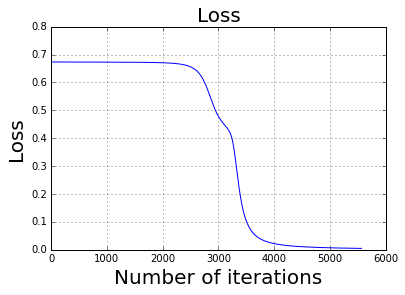

In [ ]:
ALPHA = 0.4 # learning rate

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
  return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
               (1-y) * (-z - np.log(1 + np.exp(-z))))

def get_gradients_loops(z1, a1, z2, a2, z3, a3, x, y, W1, b1, W2, b2, W3, b3):
  dz3 = a3 - y # dL/dz_3
  db3 = dz3    # dL/db_3

  dW3 = dz3 * a2.T  # dL/dW_3
  da2 = dz3 * W3.T

  dz2 = da2 * (a2 * (1-a2))
  db2 = dz2

  dW2 = np.matmul(dz2, a1.T)
  da1 = np.matmul(W2.T, dz2)

  dz1 = da1 * (a1 * (1-a1))
  dW1 = np.matmul(dz1, x.T)
  db1 = dz1

  return dW1, db1, dW2, db2, dW3, db3

def gradient_descent(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
  W1 -= alpha * (1.0/20) * dW1
  b1 -= alpha * (1.0/20) * db1
  W2 -= alpha * (1.0/20) * dW2
  b2 -= alpha * (1.0/20) * db2
  W3 -= alpha * (1.0/20) * dW3
  b3 -= alpha * (1.0/20) * db3

  return W1, b1, W2, b2, W3, b3

def get_zero_gradients(W1, b1, W2, b2, W3, b3):
  tdW1 = np.zeros_like(W1)
  tdb1 = np.zeros_like(b1)
  tdW2 = np.zeros_like(W2)
  tdb2 = np.zeros_like(b2)
  tdW3 = np.zeros_like(W3)
  tdb3 = np.zeros_like(b3)
  return tdW1, tdb1, tdW2, tdb2, tdW3, tdb3

def add_gradients(tdW1, tdb1, tdW2, tdb2, tdW3, tdb3,
                  dW1, db1, dW2, db2, dW3, db3):
  tdW1 += dW1
  tdb1 += db1
  tdW2 += dW2
  tdb2 += db2
  tdW3 += dW3
  tdb3 += db3
  return tdW1, tdb1, tdW2, tdb2, tdW3, tdb3

L_cache = []
models_cache = []

W1_initial = np.random.rand(3, 2)
W1 = W1_initial.copy()
b1 = np.zeros((3, 1))
W2_initial = np.random.rand(3, 3)
W2 = W2_initial.copy()
b2 = np.zeros((3, 1))
W3_initial = np.random.rand(1, 3)
W3 = W3_initial.copy()
b3 = np.zeros((1, 1))

for i in range(20000):
  totalL = 0
  tdW1, tdb1, tdW2, tdb2, tdW3, tdb3 = get_zero_gradients(W1, b1, W2, b2, W3, b3)
  for j in range(X.shape[0]):
    x = X[j, :].reshape(2,1)
    z1, a1, z2, a2, z3, a3 = forward(x, W1, b1, W2, b2, W3, b3)
    L = (1.0 / 20) * get_loss_numerically_stable(y[j], z3)
    totalL += L
    dW1, db1, dW2, db2, dW3, db3 = get_gradients_loops(z1, a1, z2, a2, z3, a3, x, y[j], W1, b1, W2, b2, W3, b3)
    tdW1, tdb1, tdW2, tdb2, tdW3, tdb3 = add_gradients(tdW1, tdb1, tdW2, tdb2, tdW3, tdb3,
                                                        dW1, db1, dW2, db2, dW3, db3)
  W1, b1, W2, b2, W3, b3 = gradient_descent(W1, b1, W2, b2, W3, b3, tdW1, tdb1, tdW2, tdb2, tdW3, tdb3, ALPHA)
  models_cache.append((W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()))
  L_cache.append(totalL[0,0])

  if totalL[0,0] < 0.005:
    break

plt.grid()
plt.title('Loss', size=20)
plt.xlabel('Number of iterations', size=20)
plt.ylabel('Loss', size=20)
plt.plot(L_cache)

# Decision Boundary

The decision boundaries of Logistic Regression and Softmax Regression are linear.

The decision boundaries of Neural Networks, however, are non-linear.

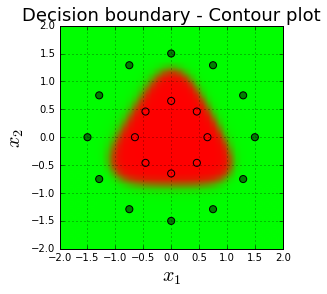

In [ ]:
NX = 40
NY = 40

def plot_decision_boundary_heatmap(X, y, W1, b1, W2, b2, W3, b3):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Decision boundary - Contour plot', size = 18)

  xs = np.linspace(-2.0, 2.0, NX)
  ys = np.linspace(2.0, -2.0, NY)

  xv, yv = np.meshgrid(xs, ys)

  predictions = []
  for x1, x2 in zip(xv.flatten(), yv.flatten()):
    x = np.array([x1, x2]).reshape(2,1)
    z1, a1, z2, a2, z3, a3 = forward(x, W1, b1, W2, b2, W3, b3)
    predictions.append(a3)

  predictions = np.array(predictions).reshape(1, NX * NY)
  predictions = np.stack( (1.0 - predictions, predictions, np.zeros((1, NX * NY))) )

  plt.imshow(predictions.T.reshape(NX, NY, 3), extent=[-2.0, 2.0, -2.0, 2.0])
  plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])

plot_decision_boundary_heatmap(X, y, W1, b1, W2, b2, W3, b3)

In [ ]:
# Import for animation
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

In [ ]:
import matplotlib.animation as animation

NX = 40
NY = 40

xs = np.linspace(-2.0, 2.0, NX)
ys = np.linspace(2.0, -2.0, NY)
xv, yv = np.meshgrid(xs, ys)

def get_predictions(xv, yv, model):
  predictions = []
  for x1, x2 in zip(xv.flatten(), yv.flatten()):
    x = np.array([x1, x2]).reshape(2,1)
    z1, a1, z2, a2, z3, a3 = forward(x, *model)
    predictions.append(a3)

  predictions = np.array(predictions).reshape(1, NX * NY)
  predictions = np.stack( (1.0 - predictions, predictions, np.zeros((1, NX * NY))) )
  return predictions.T.reshape(NX, NY, 3)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
  im.set_array(get_predictions(xv, yv, models_cache[i * 100]))
  text_box.set_text('Iteration: {}'.format(i * 100))
  return im, text_box

im = ax.imshow(get_predictions(xv, yv, models_cache[0]),
               extent=[-2.0, 2.0, -2.0, 2.0], animated = True)

ax.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
text_box = ax.text(0.6, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, int(len(models_cache)/100), blit=True, interval=100)
plt.close(fig)
anim